In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


In [8]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

In [9]:
X.shape

(1998, 2)

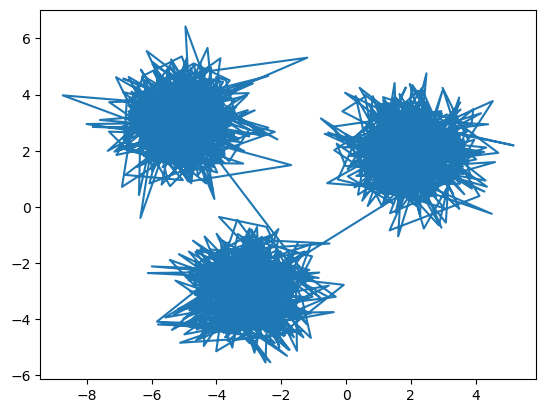

In [10]:
plt.plot(X[:,0],X[:,1])
plt.show()

initial clusters

In [11]:
C1 = X[600]
C2 = X[1260]
C3 = X[1920]

In [22]:
C1_l = []
C2_l = []
C3_l = []
for i in range(X.shape[0]):
    d1 = (X[i][0]-C1[0])**2 + (X[i][1]-C1[1])**2
    d2 = (X[i][0]-C2[0])**2 + (X[i][1]-C2[1])**2
    d3 = (X[i][0]-C3[0])**2 + (X[i][1]-C3[1])**2
    if d1<=d2 and d1<=d3:
        C1_l.append(X[i])
    elif d2<=d1 and d2<=d3:
        C2_l.append(X[i])
    else:
        C3_l.append(X[i])
    
    

In [14]:
(X[1]-X[2])**2

array([ 0.790001  , 10.35662509])

In [24]:
len(C1_l)

663

In [25]:
len(C2_l)

669

In [26]:
len(C3_l)

666

In [27]:
cluster1 = np.array(C1_l)
cluster2 = np.array(C2_l)
cluster3 = np.array(C3_l)

In [28]:
u1 = (np.mean(cluster1,axis=1),np.mean(cluster1,axis=0))

In [30]:
u2 = np.mean(cluster2)

In [31]:
u2

-3.014759136916815

In [32]:
cluster1.shape

(663, 2)

In [34]:
u1 =np.mean(cluster1,axis=0)

In [35]:
u2 = np.mean(cluster2,axis=0)

In [37]:
u3 = np.mean(cluster3,axis=0)

In [76]:
old_centroids1 = [C1,C2,C3]
shift1 =0
new_centroids1 = [u1,u2,u3]
for i in range(3):
    shift1 += (new_centroids1[i][0]-old_centroids1[i][0])**2 + (new_centroids1[i][1]-old_centroids1[i][1])**2
shift_t = (shift1)**0.5

In [77]:
shift_n>1e-4

False

In [78]:

print(shift_t)

2.840086301919124


In [103]:
label = np.zeros(X.shape[0], dtype=int)
iter = 0 
while shift_t>1e-4:
    print("yy")
    new1 = [[],[],[]]
    for i in range(X.shape[0]):
        dx1 = 100000
        c1 = 0
        for j in range(3):
            d1 = (X[i][0]-new_centroids1[j][0])**2 + (X[i][1]-new_centroids1[j][1])**2
            if dx1>d1:
                dx1 = d1
                c1 = j 
        new[c1].append(X[i])
        label[i] = c1 
    old_centroids1 = new_centroids1
    for i in range(3):
        mean_val = np.mean(new1[i],axis =0) 
        if np.isnan(mean_val).any():
            mean_val = new_centroids[i]
        new_centroids1[i] = mean_val 
    print(new_centroids1)
    shift1 =0
   
    for i in range(3):
        shift1 += (new_centroids1[i][0]-old_centroids1[i][0])**2 + (new_centroids1[i][1]-old_centroids1[i][1])**2
    shift_t = (shift1)**0.5
    iter += 1 
   

    

yy


IndexError: invalid index to scalar variable.

In [59]:
new_centroids

[array([1.98849202, 1.96021824]),
 array([-3.04475663, -2.98468709]),
 array([-5.08202338,  3.0061139 ])]

In [60]:
old_centroids

[array([1.98849202, 1.96021824]),
 array([-3.04475663, -2.98468709]),
 array([-5.08202338,  3.0061139 ])]

In [67]:
X_xlus = np.array(new)

In [93]:
def K_means_Llyod(X,K):
    initial_centres = X[np.random.choice(X.shape[0], K, replace=False)]
    label = np.zeros(X.shape[0],dtype=int)
    new_clusters = [[] for i in range(K)]
    for i in range(X.shape[0]):
        dx = 1000000
        clus = 0
        for j in range(K):
            d = (X[i][0]-initial_centres[j][0])**2 + (X[i][1]-initial_centres[j][1])**2
            if d<dx:
                dx = d 
                clus =j 
        label[i] =clus
        new_clusters[clus].append(X[i])
    new_centres = [[] for i in range(K)]
    for i in range(K):
        mean_val = np.mean(new_clusters[i],axis=0)
        if np.isnan(mean_val).any():
            mean_val = initial_centres[i]            
        new_centres[i] = mean_val

    shift =0
    for i in range(K):
        shift += (new_centres[i][0]-initial_centres[i][0])**2 + (new_centres[i][1]-initial_centres[i][1])**2
    shift_t = (shift)**0.5
        
        
    iter = 0 
    while shift_t>1e-4:
        print("yy")
        new1 = [[] for i in range(K)]
        for i in range(X.shape[0]):
            dx1 = 100000
            c1 = 0
            for j in range(K):
                d1 = (X[i][0]-new_centres[j][0])**2 + (X[i][1]-new_centres[j][1])**2
                if dx1>d1:
                    dx1 = d1
                    c1 = j 
            new1[c1].append(X[i])
            label[i] = c1 
        initial_centres = new_centres
        for i in range(K):
            mean_val = np.mean(new1[i],axis=0)
            if np.isnan(mean_val).any():
                mean_val = initial_centres[i]            
            new_centres[i] = mean_val
        
        shift =0
       
        for i in range(K):
            shift += (new_centres[i][0]-initial_centres[i][0])**2 + (new_centres[i][1]-initial_centres[i][1])**2
        shift_t = (shift)**0.5
        iter += 1 
       
    return label,new_centres
    
    

In [83]:
l = [[] for i in range(3) ]

In [84]:
l

[[], [], []]

In [88]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

In [95]:
label ,centres = K_means_Llyod(X,3)

yy


In [98]:
label

array([2, 2, 2, ..., 1, 1, 1])

In [101]:
centre = np.array(centres)

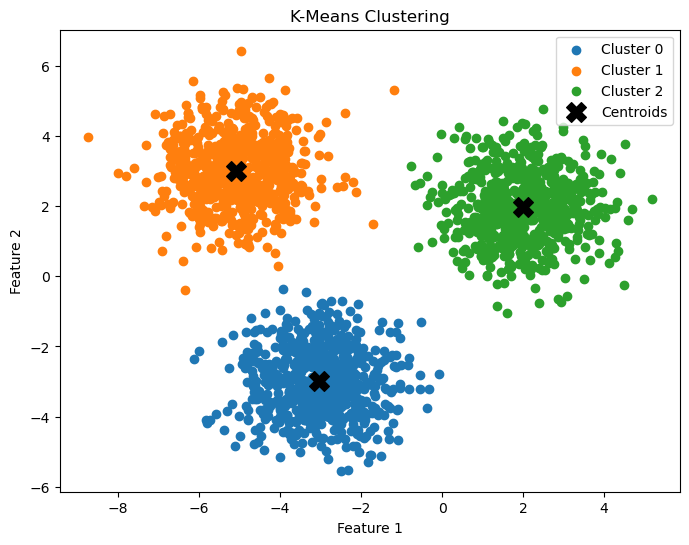

In [102]:
plt.figure(figsize=(8,6))
for i in range(len(centre)):
    points = X[label == i]  
    plt.scatter(points[:, 0], points[:, 1], label=f"Cluster {i}")


plt.scatter(centre[:, 0], centre[:, 1], c='black', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()